# Introduction to Scikit-learn(sklearn)

This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.

What we're going to cover: <br>
    - 0. An end-to-end Scikit-Learn workflow <br>
    - 1. Getting the data ready <br>
    - 2. Choose the right estimator/algorithm for our problems <br>
    - 3. Fit the model/algorithm and use it to make predictions on our data <br>
    - 4. Evaluating a model <br>
    - 5. Improve a model <br>
    - 6. Save and load a trained model <br>
    - 7. Putting it all together <br>

## 0. An end-to-end Scikit-Learn workflow

In [11]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv("heart-disease.csv")
print(heart_disease.columns)
heart_disease

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [15]:
import dataframe_image as dfi
dfi.export(heart_disease.head(),"mytable.png")

In [16]:
#pip install dataframe_image

In [21]:
X = heart_disease.drop("target", axis = 1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
labels = heart_disease['target']
labels.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

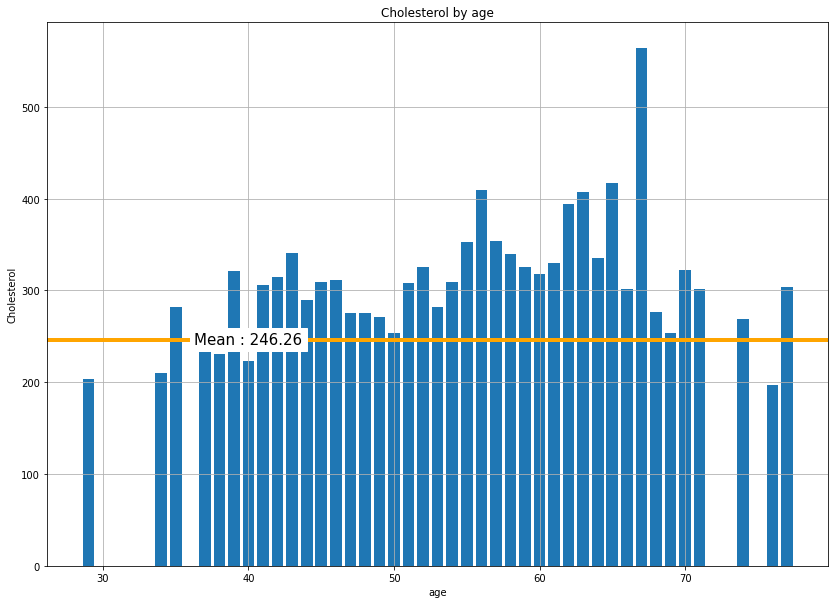

In [49]:
## Explore our data
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14,10))
ax.grid()
ax.bar(heart_disease['age'], heart_disease['chol'])
ax.set(title="Cholesterol by age", 
    xlabel="age", 
    ylabel="Cholesterol");
ax.axhline(heart_disease['chol'].mean(), color="orange", linewidth=4, label="Mean")
ax.text(40, heart_disease['chol'].mean(), 'Mean : {:.2f}'.format(heart_disease['chol'].mean()), fontsize=15, va='center', ha='center', backgroundcolor='w')
fig.savefig("cholesterol.png")

In [51]:
## Choose the right model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

## Keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [56]:
# fit the model on the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2)

61

In [57]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [64]:
import numpy as np
# make a prediction 
x_01 = np.random.rand(1, 13)
y_label = clf.predict(np.array(x_01))
print(y_label)

[0]


c:\Users\hamza\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [70]:
y_preds = clf.predict(X_test)
y_preds

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [71]:
clf.score(X_train, y_train)

1.0

In [72]:
clf.score(X_test, y_test)

0.8360655737704918

In [73]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        22
           1       0.89      0.85      0.87        39

    accuracy                           0.84        61
   macro avg       0.82      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



c:\Users\hamza\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


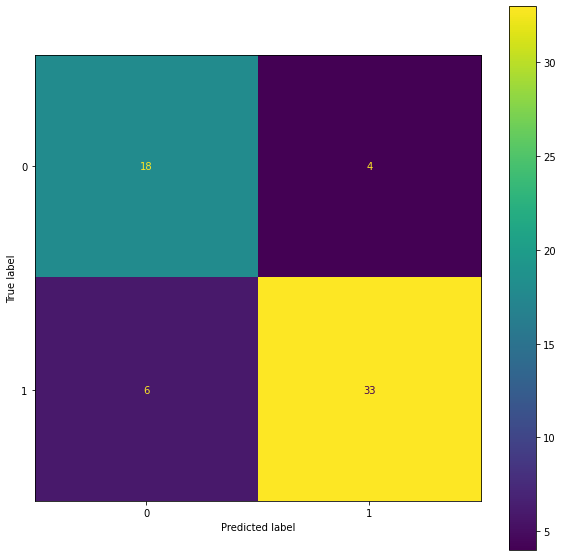

In [89]:
confusion_matrix(y_test, y_preds)
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf, X_test, y_test, ax=ax)
fig.savefig('ok.png')

In [94]:
import numpy as np
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying with {i} estimators..")
    clf = RandomForestClassifier(n_estimators = i)
    clf.fit(X_train, y_train)
    print(f"Model accuracy on test set : {clf.score(X_test, y_test) * 100}")
    print(" ")

Trying with 10 estimators..
Model accuracy on test set : 77.04918032786885
 
Trying with 20 estimators..
Model accuracy on test set : 81.9672131147541
 
Trying with 30 estimators..
Model accuracy on test set : 80.32786885245902
 
Trying with 40 estimators..
Model accuracy on test set : 81.9672131147541
 
Trying with 50 estimators..
Model accuracy on test set : 81.9672131147541
 
Trying with 60 estimators..
Model accuracy on test set : 81.9672131147541
 
Trying with 70 estimators..
Model accuracy on test set : 86.88524590163934
 
Trying with 80 estimators..
Model accuracy on test set : 83.60655737704919
 
Trying with 90 estimators..
Model accuracy on test set : 86.88524590163934
 


In [98]:
import pickle
pickle.dump(clf, open("Random_forest_model.pkl", "wb"))

In [99]:
loaded_model = pickle.load(open("Random_forest_model.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.8688524590163934

In [2]:
import warnings
warnings.filterwarnings("ignore")

# 1. Getting our data ready to be used with machine learning
Three main things to do:  <br>
    1. Split the data into features and labels (X, y) <br>
    2. Filling or disregarding missing values <br>
    3. Converting non-numerical values to numerical values (feature encoding) <br>

In [94]:
## Standard imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [95]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [96]:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [97]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f"X shape : {X.shape}")
print(f"y shape : {y.shape}")
print(f"X_train shape : {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape : {y_test.shape}")

X shape : (303, 13)
y shape : (303,)
X_train shape : (242, 13)
X_test shape : (61, 13)
y_train shape : (242,)
y_test shape : (61,)


### 1.1 make sure it's all numerical

In [98]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [99]:
len(car_sales)

1000

In [100]:
# split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [102]:
# build ML model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

### Convert to numerical values

In [103]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()

# Define the transformer
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)], 
                                remainder="passthrough")
# Fit the transformer
transformed_X =  transformer.fit_transform(X)

print(transformed_X)
print(X.head())
pd.DataFrame(transformed_X).head()

[[0.00000e+00 1.00000e+00 0.00000e+00 ... 1.00000e+00 0.00000e+00
  3.54310e+04]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 1.00000e+00
  1.92714e+05]
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 1.00000e+00 0.00000e+00
  8.47140e+04]
 ...
 [0.00000e+00 0.00000e+00 1.00000e+00 ... 1.00000e+00 0.00000e+00
  6.66040e+04]
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 1.00000e+00 0.00000e+00
  2.15883e+05]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 1.00000e+00 0.00000e+00
  2.48360e+05]]
     Make Colour  Odometer (KM)  Doors
0   Honda  White          35431      4
1     BMW   Blue         192714      5
2   Honda  White          84714      4
3  Toyota  White         154365      4
4  Nissan   Blue         181577      3


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [32]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])

In [34]:
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [40]:
# Let's re-fit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y, 
                                                    test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [41]:
model.score(X_test, y_test)

0.3235867221569877

## 1.2 Handle missing values

In [70]:
"""
1. Fill them with some value (imputation).
2. remove the samples with missing data altogether.
"""
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [71]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [72]:
### Fill missing data with pandas
# Fill "Make" Column
car_sales_missing["Make"].fillna("missing", inplace=True)

#Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

#Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

#Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [73]:
# Remove rows with missing price value
car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [74]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [75]:
# Let's try and convert our data to numbers
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)], 
                                remainder="passthrough")
transformed_X =  transformer.fit_transform(car_sales_missing)

### Option 2 : Fill missing values with sklearn

In [76]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [77]:
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [78]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [80]:
## Fill missing values with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", 
                            fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (fill missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
fill_X = imputer.fit_transform(X)
fill_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [82]:
car_sales_filled = pd.DataFrame(fill_X, columns=["Make", "Colour", "Doors" ,"Odometer (KM)"])

In [83]:
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [88]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)], 
                                remainder="passthrough")
transformed_X =  transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [90]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,y,test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

In [92]:
len(car_sales_filled)

950

# Choosing the right estimator/algorithm for our problem

* Classification - predicting whether a sample is one thing oe onother
* Regression - predicting a number

### 2.1 Picking a machine learning model for our regression problem

In [106]:
from sklearn.datasets import load_boston
boston = load_boston()

In [110]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [112]:
len(boston_df)

506

In [113]:
# Let's try the ridge regressor model

In [115]:
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Instantiate Ridge model
model = Ridge()
model.fit(X_train, y_train)

# The score
model.score(X_test, y_test)

0.6789748327846079

#### Random forest 

In [136]:
from sklearn.ensemble import RandomForestRegressor
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y)

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

print(rf.score(X_test, y_test))

from sklearn.metrics import mean_absolute_error

y_preds = rf.predict(X_test)
mean_absolute_error(y_test, y_preds)

0.8548846763019109


2.1125826771653533

# Make Predictions using a machine learning model

In [132]:
model.predict(X_test)

array([20.76445709, 21.47206467, 19.94198668, 25.76160019,  6.25120839,
       30.52264245, 20.58563733, 23.4159559 , 19.74448542, 32.77846975,
       30.35339201, 23.88853954, 28.8659447 , 31.66774336, 16.43730279,
       28.33983813, 31.84435769, 19.64115027, 25.87064036, 14.22059584,
       13.92820683, 15.56509806, 24.11612789, 16.7498878 , 13.37224917,
       29.24148532, 27.35128294, 29.90980229, 32.07068493, 31.10371133,
       21.75051982, 25.6009495 , 19.48957221, 21.05262778, 26.003086  ,
       20.06100921, 17.51254749, 17.33550242, 18.27463005, 15.47899144,
       29.93665643, 13.50654612, 22.05348963, 14.14767456, 13.96361484,
       35.71551744, 16.51297422, 19.76452093, 17.07004164, 23.3915846 ,
       27.0516969 , 33.12212081, 28.3531952 , 21.10316066, 24.93946917,
       27.342632  , 26.80255352,  3.7186232 , 35.42186679, 36.70315063,
       23.50476625, 21.13396903, 24.45598872, 13.73769646, 31.77003921,
        9.34768714, 32.64936451, 33.44537609, 31.91298129,  4.89

# Evaluate a machine learning model

* Estimator
* The score parameter
* the problem-specific metric functions

### Score method

In [139]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [141]:
clf.score(X_test, y_test)

0.8524590163934426

In [142]:
from sklearn.ensemble import RandomForestRegressor
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y)

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

print(rf.score(X_test, y_test)) # score coefficient of determmination

from sklearn.metrics import mean_absolute_error

y_preds = rf.predict(X_test)
mean_absolute_error(y_test, y_preds)

0.871829659527797


1.900000000000001

## Cross validation 

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [144]:
clf.score(X_test, y_test)

0.8524590163934426

In [145]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

#### Area under the reciever operating characteristic curve (AUC/ROC)

In [149]:
# TPR versus FPR
from sklearn.metrics import roc_curve

y_probs = clf.predict_proba(X_test)
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

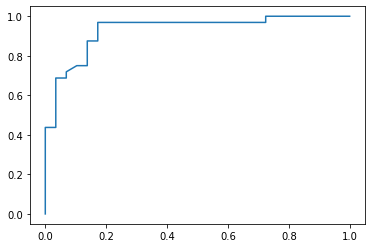

In [152]:
# calculate fpr, tpr and threshold
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

plt.plot(fpr, tpr)